In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from sklearn.utils import class_weight, shuffle
import cv2

In [3]:
IMG_SIZE = 224
NUM_CLASSES = 5
SEED = 77
TRAIN_NUM = 1000

In [4]:
path = "data/train.csv"
df_train = pd.read_csv(path)
x = df_train['id_code']
y = df_train['diagnosis']

x, y = shuffle(x, y, random_state=SEED)

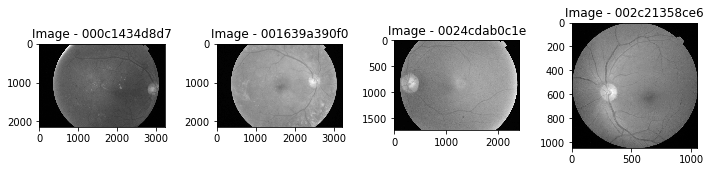

In [5]:
# Printing image grid with color images
columns = 4
rows = 1
fig = plt.figure(figsize=(10, 10))
# for i in x:
for i in range(columns*rows):
    image = cv2.imread(f"../../Desktop/FinalProject/Final_Project_data/train_images/{x[i]}.png")
    #image = cv2.imread(f'test_images/{x[i]}.png')
#     print(x[i])
    fig.add_subplot(rows, columns, i+1)
    plt.title("Image - " + x[i])
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     image = cv2.resize(image, (1000, 1000))
    plt.imshow(image, cmap='gray')
 
plt.tight_layout()

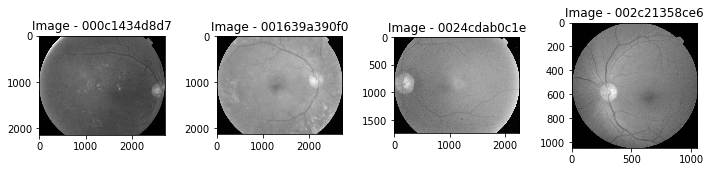

In [7]:
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

IMAGESIZE = 224
columns = 4
rows = 1
fig = plt.figure(figsize=(10, 10))
# for i in x:
for i in range(columns*rows):
    image = cv2.imread(f"../../Desktop/FinalProject/Final_Project_data/train_images/{x[i]}.png")
#     print(x[i])
    fig.add_subplot(rows, columns, i+1)
    plt.title("Image - " + x[i])
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = crop_image1(image)
    #image = cv2.resize(image, (IMAGESIZE, IMAGESIZE))
    plt.imshow(image, cmap='gray')
    
plt.tight_layout()

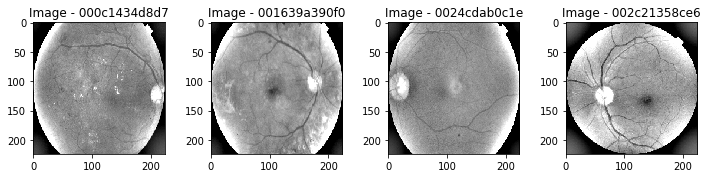

In [57]:
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]



IMAGESIZE = 224
columns = 4
rows = 1
fig = plt.figure(figsize=(10, 10))

for i in range(columns*rows):
    image = cv2.imread(f"../../Desktop/FinalProject/Final_Project_data/train_images/{x[i]}.png")
    fig.add_subplot(rows, columns, i+1)
    plt.title("Image - " + x[i])
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = crop_image1(image)
    image = cv2.resize(image, (IMAGESIZE, IMAGESIZE))
    #image = cv2.GaussianBlur( image , (0,0) , IMAGESIZE/10)
    image = cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMAGESIZE/10) ,-4 ,128)
    plt.imshow(image, cmap='gray')
    
plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2136, 3216, 3)
[3 3 3 ... 3 3 3]
1355.5
0.1652526742899299


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2136, 3216, 3)
[3 3 3 ... 6 6 6]
1354.5
0.165374677002584


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1736, 2416, 3)
[6 6 6 ... 6 6 6]
1128.5
0.19849357554275587
(1050, 1050, 3)
[  3  32  62 ... 237 214 204]
524.5
0.4270734032411821


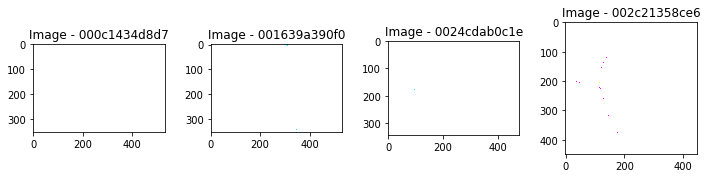

In [43]:

def scaleRadius(img,scale):
    print(img.shape)
    x=img[int(img.shape[0]/2),:,:].sum(1)
    print(x)
    r=(x>x.mean()/10).sum()/2
    print(r)
    s=scale*1.0/r
    print(s)
    return cv2.resize(img,(0,0),fx=s,fy=s)

IMAGESIZE = 224
columns = 4
rows = 1
fig = plt.figure(figsize=(10, 10))

scale=224
for i in range(columns*rows):
    #try:
        a = cv2.imread(f"../../Desktop/FinalProject/Final_Project_data/train_images/{x[i]}.png")
        fig.add_subplot(rows, columns, i+1)
        plt.title("Image - " + x[i])
        plt.imshow(a)
        a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
        a = scaleRadius(a, scale)
        a = cv2.addWeighted(a, 4, cv2.GaussianBlur(a,(0,0),scale/10), -4, 128)
        b = np.zeros(a.shape)
        cv2.circle(b,(int(a.shape[1]/2),int(a.shape[0]/2)),int(scale*0.9),(1,1,1),-1,8,0)
        a = a*b+128*(1-b)
        plt.imshow(a)
        #cv2.imwrite(str(scale)+"_"+str(i),a)
    #except:
      #  print(i)
plt.tight_layout()